Explorar datos con Python - visualizar datos
En este cuaderno, aplicaremos algunas técnicas para analizar datos con estadísticas básicas y visualizarlos mediante gráficos.

Cargar nuestros datos
Antes de empezar, vamos a cargar los mismos datos sobre horas de estudio que analizamos en el cuaderno anterior. También recalcularemos quién aprobó la clase de la misma forma que la última vez.

Ejecuta el código de la celda de abajo pulsando el botón ► Ejecutar para ver los datos.

In [3]:
import pandas as pd

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students 

Visualización de datos con Matplotlib
Los DataFrames son una excelente forma de explorar y analizar datos tabulares, pero a veces una imagen vale más que mil filas y columnas. La biblioteca Matplotlib proporciona la base para trazar visualizaciones de datos que pueden mejorar en gran medida su capacidad para analizar los datos.

Empecemos con un simple gráfico de barras que muestra la calificación de cada alumno.

Nota: Este primer gráfico puede tardar de 1 a 2 minutos en renderizarse. Los gráficos siguientes se mostrarán más rápidamente.

In [ ]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

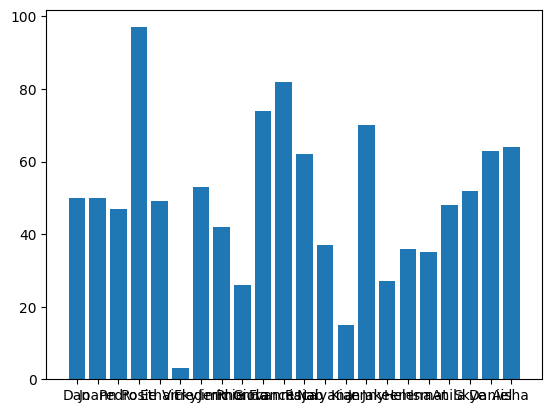

Bueno, eso funcionó, pero el gráfico podría utilizar algunas mejoras para que sea más claro lo que estamos viendo.<br>

Tenga en cuenta que ha utilizado la clase pyplot de Matplotlib para trazar el gráfico. Esta clase proporciona muchas formas de mejorar los elementos visuales del gráfico. Por ejemplo, el siguiente código:<br>

Especifica el color del gráfico de barras.<br>
Añade un título al gráfico (para que sepamos lo que representa).<br>
Añade etiquetas a los ejes X e Y (para que sepamos qué eje muestra qué datos)<br>
Añade una cuadrícula (para que sea más fácil determinar los valores de las barras)<br>
Gira los marcadores X (para que podamos leerlos)

In [ ]:
# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

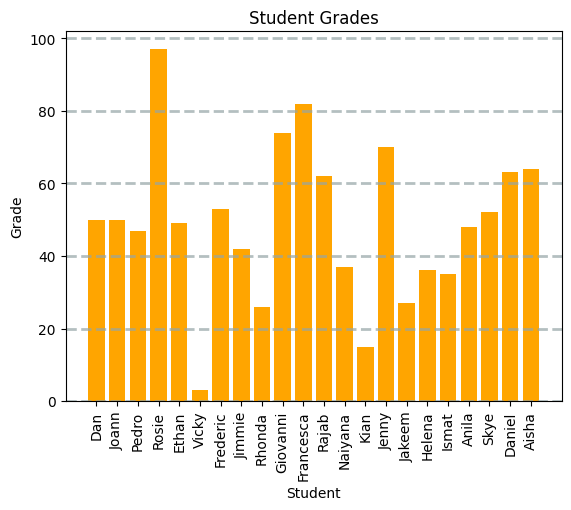

Un gráfico está técnicamente contenido dentro de una Figura. En los ejemplos anteriores, la figura se creó implícitamente para usted, pero puede crearla explícitamente. Por ejemplo, el siguiente código crea una figura con un tamaño específico.

In [ ]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

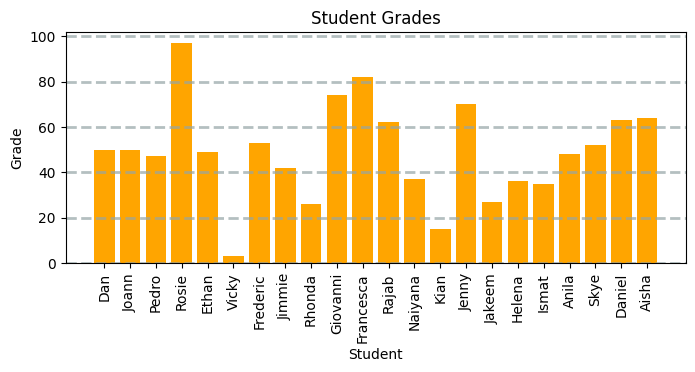

Una figura puede contener múltiples subparcelas, cada una en su propio eje.

Por ejemplo, el siguiente código crea una figura con dos subparcelas: una es un gráfico de barras que muestra las calificaciones de los estudiantes, y la otra es un gráfico circular que compara el número de calificaciones de aprobado con el de no aprobado.

In [ ]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

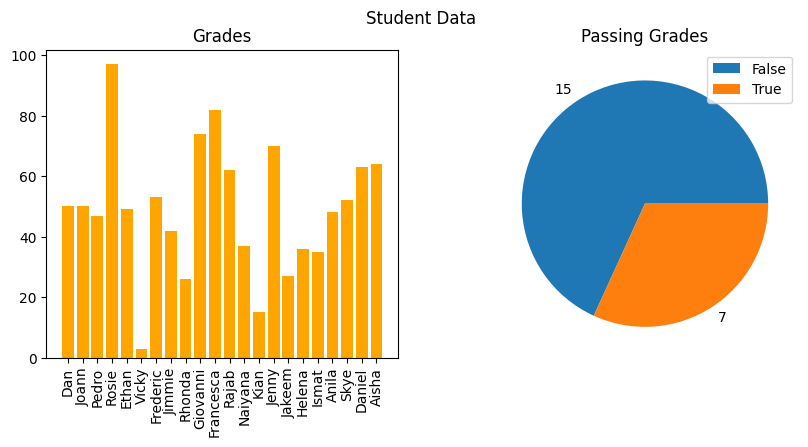

Hasta ahora, has usado métodos del objeto Matplotlib.pyplot para trazar gráficos. Sin embargo, Matplotlib es tan fundamental para los gráficos en Python que muchos paquetes, incluyendo Pandas, proporcionan métodos que abstraen las funciones subyacentes de Matplotlib y simplifican el trazado. Por ejemplo, el DataFrame proporciona sus propios métodos para trazar datos como se muestra en el siguiente ejemplo, que traza un gráfico de barras de horas de estudio.

In [ ]:
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

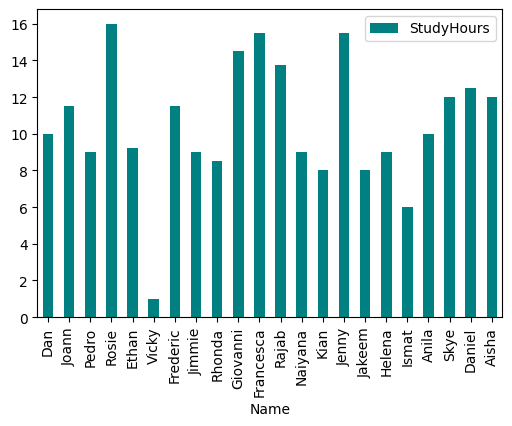

Introducción al análisis estadístico<br>
Ahora que ya sabes cómo utilizar Python para manipular y visualizar datos, puedes empezar a analizarlos.<br>

Gran parte de la ciencia de datos tiene sus raíces en la estadística, por lo que exploraremos algunas técnicas estadísticas básicas.

Estadística descriptiva y distribución de datos<br>
Cuando se examina una variable (por ejemplo, una muestra de calificaciones de estudiantes), los científicos de datos están especialmente interesados en su distribución (en otras palabras, cómo se distribuyen los diferentes valores de las calificaciones en la muestra). El punto de partida para esta exploración suele ser visualizar los datos como un histograma y ver con qué frecuencia se produce cada valor de la variable.

In [ ]:
# Get the variable to examine
var_data = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

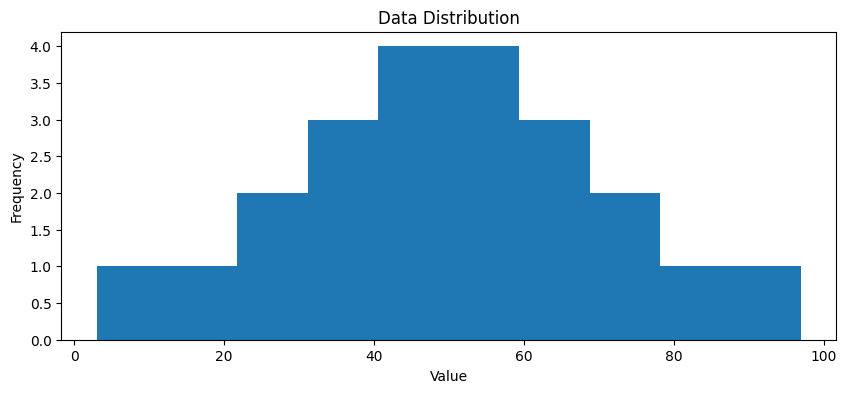

El histograma de calificaciones tiene una forma simétrica, en la que las calificaciones más frecuentes tienden a situarse en el centro del intervalo (en torno a 50), con menos calificaciones en los extremos de la escala.

Medidas de tendencia central
Para entender mejor la distribución, podemos examinar las llamadas medidas de tendencia central, que es una forma elegante de describir las estadísticas que representan el "medio" de los datos. El objetivo de este análisis es tratar de encontrar un valor "típico". Algunas formas habituales de definir el centro de los datos son:

La media: Un promedio simple basado en la suma de todos los valores del conjunto de muestras y dividiendo el total por el número de muestras.
La mediana: El valor en el centro del rango de todos los valores de la muestra.
La moda: El valor más frecuente en el conjunto de muestras*.
Calculemos estos valores, junto con los valores mínimo y máximo para compararlos, y mostrémoslos en el histograma.

In [ ]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

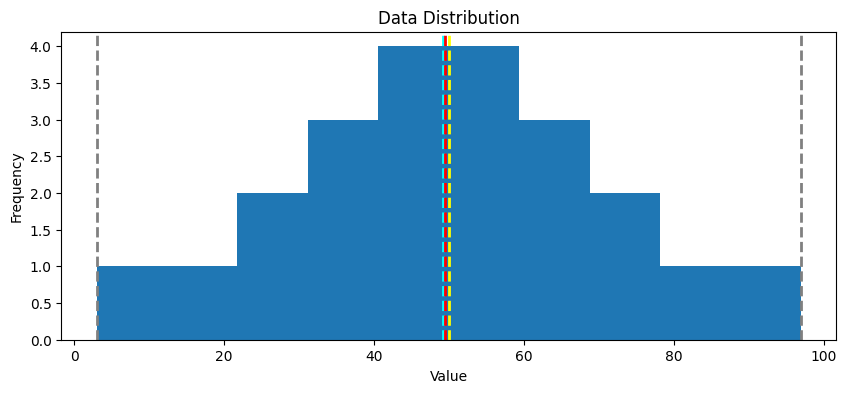

En el caso de las calificaciones, la media, la mediana y la moda parecen estar más o menos en el centro del mínimo y el máximo, en torno a los 50 puntos.

Otra forma de visualizar la distribución de una variable es utilizar un diagrama de caja (a veces llamado diagrama de caja y bigotes). Vamos a crear uno para los datos de calificaciones.

In [ ]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

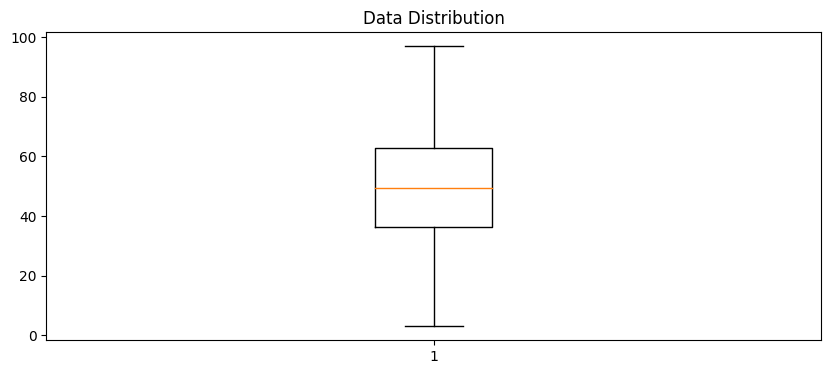

El diagrama de cajas muestra la distribución de los valores de las calificaciones en un formato diferente del histograma. La parte de la caja del gráfico muestra dónde se encuentran los dos cuartiles interiores de los datos. En este caso, la mitad de las calificaciones se sitúan entre 36 y 63 aproximadamente. Los bigotes que se extienden desde la caja muestran los dos cuartiles exteriores, por lo que la otra mitad de las calificaciones en este caso están entre 0 y 36 o 63 y 100. La línea en la caja indica la mediana de los datos. La línea del recuadro indica el valor mediano.

Para el aprendizaje, puede ser útil combinar histogramas y gráficos de caja, cambiando la orientación del gráfico de caja para alinearlo con el histograma. (En cierto modo, puede ser útil pensar en el histograma como una vista en "alzado frontal" de la distribución, y en la gráfica de caja como una vista en "planta" de la distribución desde arriba).

In [ ]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

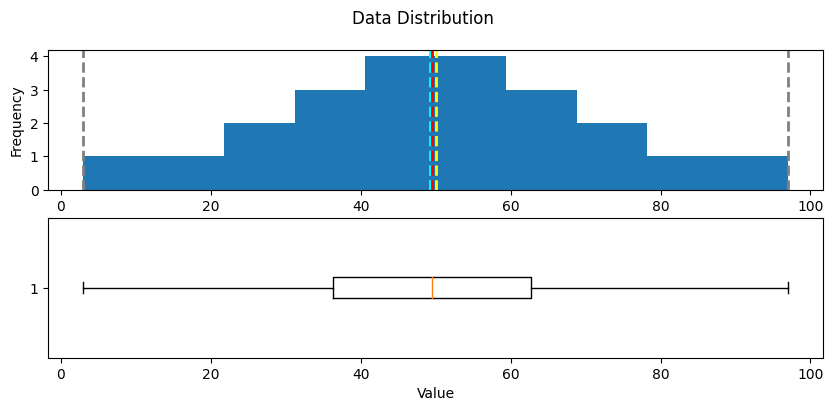

Todas las medidas de tendencia central se encuentran justo en el centro de la distribución de datos, que es simétrica, con valores cada vez más bajos en ambas direcciones a partir del centro.

Para explorar esta distribución con más detalle, es necesario comprender que la estadística consiste fundamentalmente en tomar muestras de datos y utilizar funciones de probabilidad para extrapolar información sobre toda la población de datos.

¿Qué significa esto? Las muestras se refieren a los datos que tenemos a mano, como la información sobre los hábitos de estudio y las notas de estos 22 estudiantes. La población se refiere a todos los datos posibles que podríamos recopilar, como las notas y los hábitos de estudio de todos los estudiantes en todas las instituciones educativas a lo largo de la historia. Normalmente nos interesa la población, pero no resulta práctico recopilar todos esos datos. En su lugar, tenemos que intentar estimar cómo es la población a partir de la pequeña cantidad de datos (muestras) de que disponemos.

Si tenemos suficientes muestras, podemos calcular algo llamado función de densidad de probabilidad, que estima la distribución de las calificaciones para toda la población.

La clase pyplot de Matplotlib proporciona una útil función gráfica para mostrar esta densidad.

In [ ]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)

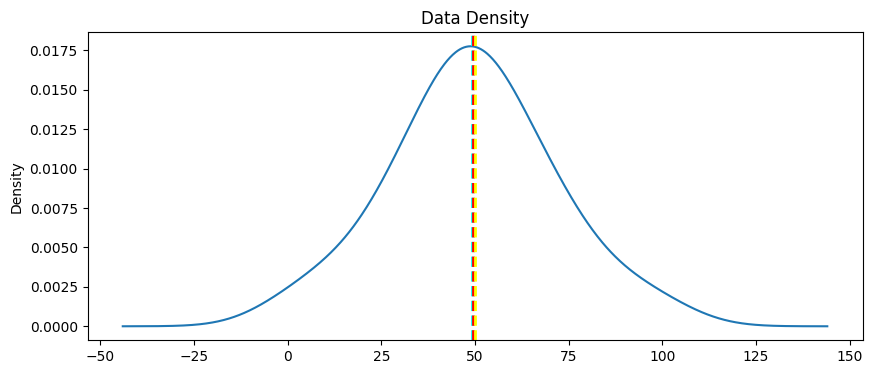

Como cabía esperar del histograma de la muestra, la densidad muestra la característica "curva de campana" de lo que los estadísticos llaman una distribución normal con la media y la moda en el centro y colas simétricas.

Resumen
¡Buen trabajo! Había una serie de conceptos nuevos aquí, así que vamos a resumir.

Aquí tenemos:

Hecho gráficos con Matplotlib.
Visto cómo personalizar estos gráficos.
Calculado estadísticas básicas, tales como medianas.
Observado la dispersión de los datos utilizando gráficos de caja e histogramas.
Aprender sobre muestras frente a poblaciones.
Estimado cómo podría ser la población de calificaciones a partir de una muestra de calificaciones.
En nuestro próximo cuaderno, veremos cómo detectar datos inusuales y encontrar relaciones entre los datos.

Lecturas adicionales
Para aprender más sobre los paquetes de Python que has explorado en este cuaderno, consulta la siguiente documentación:

[NumPy](https://numpy.org/doc/stable/) <br>
[Pandas](https://pandas.pydata.org/pandas-docs/stable/) <br>
[Matplotlib](https://matplotlib.org/contents.html)